<h1 align="center"> Principle Component Analysis (PCA) for Data Visualization </h1>

In [319]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load Iris Dataset

In [342]:
# loading dataset into Pandas DataFrame
df = pd.read_csv("auto.csv")    

In [343]:
#first 5 rows
df.head()

,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450,13.055556,Medium,0,1


In [344]:
df.shape

(201, 30)

In [345]:
#List of the all columns
df.keys()

Index(['Unnamed: 0.1', 'symboling', 'normalized-losses', 'make', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower-binned', 'diesel',
       'gas'],
      dtype='object')

In [346]:
df2=df.drop(columns=['Unnamed: 0.1'])

In [347]:
df2.dropna(axis=0, how='any', inplace=True)

In [348]:
#list the data types of the attributes
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 200
Data columns (total 29 columns):
symboling            196 non-null int64
normalized-losses    196 non-null int64
make                 196 non-null object
aspiration           196 non-null object
num-of-doors         196 non-null object
body-style           196 non-null object
drive-wheels         196 non-null object
engine-location      196 non-null object
wheel-base           196 non-null float64
length               196 non-null float64
width                196 non-null float64
height               196 non-null float64
curb-weight          196 non-null int64
engine-type          196 non-null object
num-of-cylinders     196 non-null object
engine-size          196 non-null int64
fuel-system          196 non-null object
bore                 196 non-null float64
stroke               196 non-null float64
compression-ratio    196 non-null float64
horsepower           196 non-null float64
peak-rpm             196 non-n

In [349]:
#create a new data frame containing only the numerical values
newdf = df2.select_dtypes(include=['int64', 'float64'])
newdf.head()
#newdf.columns

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,0,1


## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [350]:

# Separating out the features
x = newdf.loc[ :, : ].values

# Separating out the target
y = df2.loc[:, : ].values

# Standardizing the features
x= StandardScaler().fit_transform(x)

In [351]:
pd.DataFrame(data = x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.791686,0.017820,-1.679830,-0.438266,-0.844053,-2.154372,-0.006829,0.078294,0.519114,-1.826344,-0.290145,0.237411,-0.215227,-0.699248,-0.582184,0.050961,0.566664,-0.3371,0.3371
1,1.791686,0.017820,-1.679830,-0.438266,-0.844053,-2.154372,-0.006829,0.078294,0.519114,-1.826344,-0.290145,0.237411,-0.215227,-0.699248,-0.582184,0.433478,0.566664,-0.3371,0.3371
2,0.162125,0.017820,-0.713096,-0.244123,-0.176017,-0.628296,0.529771,0.646646,-2.402718,0.663672,-0.290145,1.434486,-0.215227,-1.016133,-0.730956,0.433478,1.053391,-0.3371,0.3371
3,0.976905,1.327556,0.155326,0.192698,0.158001,0.177134,-0.418549,-0.464225,-0.516472,0.443038,-0.042805,-0.013140,0.858129,-0.223921,-0.135868,0.108879,-0.011324,-0.3371,0.3371
4,0.976905,1.327556,0.089785,0.192698,0.253435,0.177134,0.531723,0.233299,-0.516472,0.443038,-0.537485,0.348767,0.858129,-1.174575,-1.326043,0.554406,1.337315,-0.3371,0.3371


In [352]:
#explained variance ratio
pca.explained_variance_ratio_

array([0.44306804, 0.22386472])

### Choosing the number of components

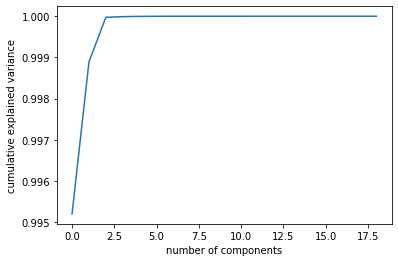

In [353]:
pca = PCA().fit(newdf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA Projection to 2D

In [354]:
#2 components
pca = PCA(n_components=2)

In [355]:
principalComponents = pca.fit_transform(x.data)

In [356]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [357]:
principalDf.shape

(196, 2)

In [358]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.551959,-2.246953
1,-0.437096,-2.252716
2,0.798796,-1.433382
3,-0.180905,-0.922917
4,1.651244,-1.804376


In [359]:
#Concatenating DataFrame along axis = 1 before plotting the data.
df_object = df2.select_dtypes(include=['object'])
# Separating out the target
y = df_object.loc[:, :].values
finalDf = pd.concat([principalDf, df_object], axis = 1)
finalDf.head()

,principal component 1,principal component 2,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,-0.551959,-2.246953,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,-0.437096,-2.252716,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,0.798796,-1.433382,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,-0.180905,-0.922917,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,1.651244,-1.804376,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


In [360]:
finalDf.shape

(201, 12)

### Visualize 2D Projection
Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

In [361]:
df2.aspiration.unique()

array(['std', 'turbo'], dtype=object)

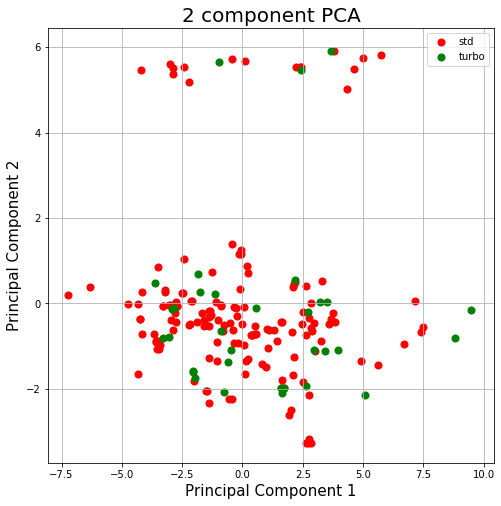

In [362]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
aspirations = ['std', 'turbo']
colors = ['r', 'g', 'b']
for aspiration, color in zip(aspirations,colors):
    indicesToKeep = finalDf['aspiration'] == aspiration
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(aspirations)
ax.grid()